In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew,norm
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# <font color='green'>Step1:Data understanding, preparation, pre-processing</font>

In [3]:
# Read the training data from csv file

telecom = pd.read_csv('train.csv')
telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
# Describe the data
telecom.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [5]:
# Get information about the data
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
# Read the test data from csv file
telecom_test = pd.read_csv('test.csv')
telecom_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

## <font color='orange'>NULL value check and imputation</font>

In [7]:
#Check which columns have more than 70% missing values
missing_values = round(100*(telecom.isna().sum(axis = 0)/telecom.shape[0]),2)
missing_values.loc[missing_values>70]

date_of_last_rech_data_6    74.90
date_of_last_rech_data_7    74.48
date_of_last_rech_data_8    73.69
total_rech_data_6           74.90
total_rech_data_7           74.48
total_rech_data_8           73.69
max_rech_data_6             74.90
max_rech_data_7             74.48
max_rech_data_8             73.69
count_rech_2g_6             74.90
count_rech_2g_7             74.48
count_rech_2g_8             73.69
count_rech_3g_6             74.90
count_rech_3g_7             74.48
count_rech_3g_8             73.69
av_rech_amt_data_6          74.90
av_rech_amt_data_7          74.48
av_rech_amt_data_8          73.69
arpu_3g_6                   74.90
arpu_3g_7                   74.48
arpu_3g_8                   73.69
arpu_2g_6                   74.90
arpu_2g_7                   74.48
arpu_2g_8                   73.69
night_pck_user_6            74.90
night_pck_user_7            74.48
night_pck_user_8            73.69
fb_user_6                   74.90
fb_user_7                   74.48
fb_user_8     

In [8]:
#Check missing values in test set
missing_values1 = round(100*(telecom_test.isna().sum(axis = 0)/telecom_test.shape[0]),2)
missing_values1.loc[missing_values1>70]

date_of_last_rech_data_6    74.72
date_of_last_rech_data_7    74.31
date_of_last_rech_data_8    73.59
total_rech_data_6           74.72
total_rech_data_7           74.31
total_rech_data_8           73.59
max_rech_data_6             74.72
max_rech_data_7             74.31
max_rech_data_8             73.59
count_rech_2g_6             74.72
count_rech_2g_7             74.31
count_rech_2g_8             73.59
count_rech_3g_6             74.72
count_rech_3g_7             74.31
count_rech_3g_8             73.59
av_rech_amt_data_6          74.72
av_rech_amt_data_7          74.31
av_rech_amt_data_8          73.59
arpu_3g_6                   74.72
arpu_3g_7                   74.31
arpu_3g_8                   73.59
arpu_2g_6                   74.72
arpu_2g_7                   74.31
arpu_2g_8                   73.59
night_pck_user_6            74.72
night_pck_user_7            74.31
night_pck_user_8            73.59
fb_user_6                   74.72
fb_user_7                   74.31
fb_user_8     

In [9]:
#Impute the recharge columns with 0 because missing values means 0 recharge

rech = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "max_rech_data_6",
           "max_rech_data_7", "max_rech_data_8", "av_rech_amt_data_6", "av_rech_amt_data_7", 
           "av_rech_amt_data_8"]

telecom[rech] = telecom[rech].fillna(0)
telecom_test[rech] = telecom_test[rech].fillna(0)

In [10]:
#night_pck_user and fb_user columns are categorical
categorical =  [ 'night_pck_user_6',
                 'night_pck_user_7',
                 'night_pck_user_8',
                 'fb_user_6',
                 'fb_user_7',
                 'fb_user_8'
                ]
#Fill missing values with mode
for column in categorical:
    telecom[column]=telecom[column].fillna(telecom[column].mode()[0])
    telecom_test[column]=telecom_test[column].fillna(telecom_test[column].mode()[0])

## <font color='orange'>Remove columns with Zero variance</font>

In [11]:
#Find the columns containing only single value or no variance
single=[i for i in telecom.columns if telecom[i].nunique()==1]
single

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [12]:
#Let us drop the columns with no variance
telecom.drop(single,1, inplace=True)
telecom_test.drop(single,1, inplace=True)

In [13]:
#Again check which columns have more than 70% missing values
missing_values = round(100*(telecom.isna().sum(axis = 0)/telecom.shape[0]),2)
missing_values.loc[missing_values>70]

date_of_last_rech_data_6    74.90
date_of_last_rech_data_7    74.48
date_of_last_rech_data_8    73.69
count_rech_2g_6             74.90
count_rech_2g_7             74.48
count_rech_2g_8             73.69
count_rech_3g_6             74.90
count_rech_3g_7             74.48
count_rech_3g_8             73.69
arpu_3g_6                   74.90
arpu_3g_7                   74.48
arpu_3g_8                   73.69
arpu_2g_6                   74.90
arpu_2g_7                   74.48
arpu_2g_8                   73.69
dtype: float64

In [14]:
#Again check which columns have more than 70% missing values in test set
missing_values = round(100*(telecom_test.isna().sum(axis = 0)/telecom_test.shape[0]),2)
missing_values.loc[missing_values>70]

date_of_last_rech_data_6    74.72
date_of_last_rech_data_7    74.31
date_of_last_rech_data_8    73.59
count_rech_2g_6             74.72
count_rech_2g_7             74.31
count_rech_2g_8             73.59
count_rech_3g_6             74.72
count_rech_3g_7             74.31
count_rech_3g_8             73.59
arpu_3g_6                   74.72
arpu_3g_7                   74.31
arpu_3g_8                   73.59
arpu_2g_6                   74.72
arpu_2g_7                   74.31
arpu_2g_8                   73.59
dtype: float64

In [15]:
#Drop these columns
drop_col = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8']
telecom.drop(drop_col, 1, inplace=True)
telecom_test.drop(drop_col, 1, inplace=True)

## <font color='orange'>Find High value customers</font>

In [16]:
#We will consider high value customers as those whose average recharge value across 2 months is more than 70% customers
telecom['AVG_rech'] = telecom[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis = 1)
highvalue_cust = telecom[(telecom['AVG_rech'] > telecom['AVG_rech'].quantile(0.7))]
highvalue_cust.drop(['AVG_rech'], axis = 1, inplace = True)
highvalue_cust.shape

(20951, 144)

In [17]:
#Removing the date columns as they have lot of missing value and it is difficult to impute dates
date_cols = ['date_of_last_rech_6','date_of_last_rech_7', 'date_of_last_rech_8']
highvalue_cust.drop(date_cols, axis = 1, inplace = True)
highvalue_cust.reset_index(inplace = True)
highvalue_cust.drop(['index'], axis = 1, inplace = True)
highvalue_cust.shape

(20951, 141)

In [18]:
#Removing the date columns from test set as they have lot of missing value and it is difficult to impute dates
telecom_test.drop(date_cols, axis = 1, inplace = True)
telecom_test.reset_index(inplace = True)
telecom_test.drop(['index'], axis = 1, inplace = True)
telecom_test.shape

(30000, 140)

## <font color='orange'>Find percentage of churners and non-churners among High value customers</font>

In [19]:
print('*******************Churn Probability*********************')
print(highvalue_cust.churn_probability.value_counts()*100/highvalue_cust.shape[0])

*******************Churn Probability*********************
0    91.1651
1     8.8349
Name: churn_probability, dtype: float64


##### <font color='red'>Observation:</font>
Around 9 percent of high value customers in trainig data are likely to churn 

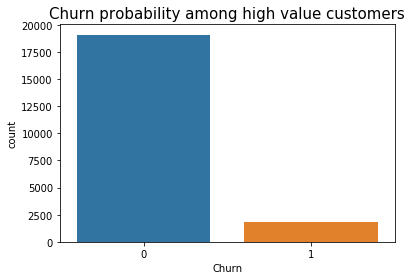

In [20]:
sns.countplot(x = highvalue_cust.churn_probability)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.title("Churn probability among high value customers", fontsize = 15)
plt.show() 

## <font color='orange'>Missing value imputation using KNNImputer</font>

In [21]:
#missing value imputation for training data
c1 = round(100*(highvalue_cust.isna().sum(axis=0)/highvalue_cust.shape[0]), 2)
i1=c1.loc[c1>0]
impute_cols = list(i1.index)
drna = highvalue_cust.dropna()
highvalue_cust.shape[0]-drna.shape[0]
#Use KNNImputer
impute = KNNImputer(n_neighbors=5)
churn_data_num = highvalue_cust[impute_cols]
churn1 = highvalue_cust.drop(impute_cols, axis = 1)
churn_imputed = impute.fit_transform(churn_data_num)
churn_imputed = pd.DataFrame(churn_imputed, columns= impute_cols)
churn_final = pd.concat([churn_imputed, churn1], axis = 1, join = 'inner')
print(churn_final.shape)
churn_final.head()

(20951, 141)


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,12,439.919,397.946,392.024,816.44,836.23,687.41,34.49,35.34,26.99,15,10,20,521,418,365,110,110,50,110,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,322,0.0,0.0,0.0,0
1,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,580.549,377.294,338.286,327.64,366.79,391.53,233.18,777.39,629.94,5,3,4,654,400,652,250,250,250,0,150,250,1.0,0.0,1.0,154.0,0.0,154.0,154.0,0.0,154.0,260.42,0.0,354.35,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,602,0.0,0.0,0.0,0
2,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,23,1130.948,905.506,479.762,1152.99,822.83,387.81,598.54,448.36,203.29,26,19,10,1420,990,494,110,110,144,110,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.

In [22]:
#Again check if there is any missing value in training data
c2 = round(100*(churn_final.isnull().sum(axis=0)/churn_final.shape[0]), 2)
c2[c2>0]

Series([], dtype: float64)

In [23]:
#missing value imputation for test data
c1 = round(100*(telecom_test.isna().sum(axis=0)/telecom_test.shape[0]), 2)
i1=c1.loc[c1>0]
impute_cols = list(i1.index)
drna = telecom_test.dropna()
telecom_test.shape[0]-drna.shape[0]
#Use KNNImputer
impute = KNNImputer(n_neighbors=5)
churn_data_num = telecom_test[impute_cols]
churn1 = telecom_test.drop(impute_cols, axis = 1)
churn_imputed = impute.fit_transform(churn_data_num)
churn_imputed = pd.DataFrame(churn_imputed, columns= impute_cols)
test_final = pd.concat([churn_imputed, churn1], axis = 1, join = 'inner')
print(test_final.shape)
test_final.head()

(30000, 140)


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,69999,91.882,65.330,64.445,91.94,52.39,57.94,41.73,43.56,36.26,5,5,4,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1692,0.00,0.00,0.00
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,70000,414.168,515.568,360.868,549.86,663.06,415.59,296.33,339.64,281.66,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,2533,0.00,0.00,0.00
2,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,70001,329.844,434.884,746.239,0.00,0.00,0.00,0.00,0.00,0.00,6,9,5,500,1000,1000,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,277,525.61,758.41,241.84
3,5.31,2.16,0.00,40

In [24]:
#Again check if there is any missing value in test data
c2 = round(100*(test_final.isnull().sum(axis=0)/test_final.shape[0]), 2)
c2[c2>0]

Series([], dtype: float64)

##### <font color='red'>Observation:</font>
There isnt any missing value in training and test set

## <font color='orange'>Outlier detection and removal</font>

In [25]:
# Outliers detection and removal for Numeric ,columns
numeric = churn_final.columns[(churn_final.dtypes=="float64")|(churn_final.dtypes=="int64")].tolist()
for col in numeric:
    Q1 = churn_final[col].quantile(0.01)
    Q99 = churn_final[col].quantile(0.99)
    IQR = Q99 - Q1
    churn_final = churn_final[(churn_final[col] >= Q1 - 1.5*IQR) & (churn_final[col] <= Q99 + 1.5*IQR)]
churn_final.shape

(18312, 141)

# <font color='green'>Step2:EDA and Feature Engineering</font>

## <font color='orange'>Correlation</font>

In [26]:
corr_mat= churn_final[numeric].corr()
corr_mat1 = corr_mat.stack().reset_index().sort_values(by = 0, ascending = False)
#Filter correlations only above certain threshold
corr_mat1 = corr_mat1[((corr_mat1[0] < 1) & (corr_mat1[0] >= 0.70)) | ((corr_mat1[0] <= -0.70) & (corr_mat1[0] > -1))]
corr_mat1

,level_0,level_1,0
7566,loc_ic_mou_6,total_ic_mou_6,0.954990
11751,total_ic_mou_6,loc_ic_mou_6,0.954990
11888,total_ic_mou_7,loc_ic_mou_7,0.951357
7703,loc_ic_mou_7,total_ic_mou_7,0.951357
12025,total_ic_mou_8,loc_ic_mou_8,0.950454
7840,loc_ic_mou_8,total_ic_mou_8,0.950454
12866,total_rech_amt_8,arpu_8,0.941199
11246,arpu_8,total_rech_amt_8,0.941199
3946,std_og_t2t_mou_8,onnet_mou_8,0.925530
301,onnet_mou_8,std_og_t2t_mou_8,0.925530


##### <font color='red'>Observation:</font>
1.Related features within the same month have high correlation(for ex-total_rech_amt_8,arpu_8) 

2.Same features in different months have high correlation(for ex-loc_ic_mou_6,loc_og_mou_7,loc_og_mou_8).

3.We will not be dropping features since we are going to use PCA which will find out top features.

## <font color='orange'>Derived Feature Creation</font>

##### <font color='red'>Strategy:</font>
1.Based on the observation 2 above we will create a feature for mean value of the feature across three given months(6,7,8).

2.For the recharge feature we will create mean,max and min.

In [27]:
### Derived features for recharge columns including minimum,maximum and mean wherever applicable

# last_day_rch_amt 
cols = ['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
churn_final['mean_last_day_rch_amt'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_last_day_rch_amt'] = round(test_final[cols].mean(axis=1),2)

# max_rech_amt 
cols = ['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']
churn_final['mean_max_rech_amt'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_max_rech_amt'] = round(test_final[cols].mean(axis=1),2)

# total_rech_num 
cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
churn_final['mean_total_rech_num'] = round(churn_final[cols].mean(axis=1),2)  
test_final['mean_total_rech_num'] = round(test_final[cols].mean(axis=1),2)  

churn_final['min_total_rech_num'] = churn_final[cols].min(axis=1)   
test_final['min_total_rech_num'] = test_final[cols].min(axis=1) 

churn_final['max_total_rech_num'] = churn_final[cols].max(axis=1)
test_final['max_total_rech_num'] =  test_final[cols].max(axis=1)  

# total_rech_amt 
cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
churn_final['mean_total_rech_amt'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_total_rech_amt'] = round(test_final[cols].mean(axis=1),2)

churn_final['min_total_rech_amt'] = churn_final[cols].min(axis=1)
test_final['min_total_rech_amt'] = test_final[cols].min(axis=1)

churn_final['max_total_rech_amt'] = churn_final[cols].max(axis=1)
test_final['max_total_rech_amt'] = test_final[cols].max(axis=1)

In [28]:
### Derived features for Roaming columns:let us calculate mean for 3 months
# Get the mean of roam_ic_mou over 3 months
cols = ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
churn_final['mean_roam_ic_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_roam_ic_mou'] = round(test_final[cols].mean(axis=1),2)

# Get the mean of roam_og_mou over 3 months
cols = ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']
churn_final['mean_roam_og_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_roam_og_mou'] = round(test_final[cols].mean(axis=1),2)

# Get the mean of roam_ic_mou and roam_og_mou over 3 months
churn_final['mean_roam_mou'] = churn_final['mean_roam_ic_mou'] + churn_final['mean_roam_og_mou']
test_final['mean_roam_mou'] = test_final['mean_roam_ic_mou'] + test_final['mean_roam_og_mou']

In [29]:
### Calculate mean of onnet mou in the last 3 months
cols = ['onnet_mou_6','onnet_mou_7','onnet_mou_8']
churn_final['mean_onnet_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_onnet_mou'] = round(test_final[cols].mean(axis=1),2)

# Calculate mean of offnet mou in the last 3 months
cols = ['offnet_mou_6','offnet_mou_7','offnet_mou_8']
churn_final['mean_offnet_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_offnet_mou'] = round(test_final[cols].mean(axis=1),2)

# Calculate mean total of both onnet and offnet mou in the last 3 months
churn_final['mean_onnet_offnet_mou'] = churn_final['mean_onnet_mou'] + churn_final['mean_offnet_mou']
test_final['mean_onnet_offnet_mou'] = test_final['mean_onnet_mou'] + test_final['mean_offnet_mou']

# Calculate mean of loc-t2t columns
cols = ['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8']
churn_final['mean_loc_ic_t2t_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_loc_ic_t2t_mou'] = round(test_final[cols].mean(axis=1),2)

cols = ['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8']
churn_final['mean_loc_og_t2t_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_loc_og_t2t_mou'] = round(test_final[cols].mean(axis=1),2)

churn_final['mean_loc_t2t_mou'] = churn_final['mean_loc_ic_t2t_mou'] + churn_final['mean_loc_og_t2t_mou']
test_final['mean_loc_t2t_mou'] = test_final['mean_loc_ic_t2t_mou'] + test_final['mean_loc_og_t2t_mou']

# Calculate mean of loc-t2m columns
cols = ['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8']
churn_final['mean_loc_ic_t2m_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_loc_ic_t2m_mou'] = round(test_final[cols].mean(axis=1),2)

cols = ['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8']
churn_final['mean_loc_og_t2m_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_loc_og_t2m_mou'] = round(test_final[cols].mean(axis=1),2)

churn_final['mean_loc_t2m_mou'] = churn_final['mean_loc_ic_t2m_mou'] + churn_final['mean_loc_og_t2m_mou']
test_final['mean_loc_t2m_mou'] = test_final['mean_loc_ic_t2m_mou'] + test_final['mean_loc_og_t2m_mou']

# Calculate mean of loc-t2f columns
cols = ['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8']
churn_final['mean_loc_ic_t2f_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_loc_ic_t2f_mou'] = round(test_final[cols].mean(axis=1),2)

cols = ['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8']
churn_final['mean_loc_og_t2f_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_loc_og_t2f_mou'] = round(test_final[cols].mean(axis=1),2)

churn_final['mean_loc_t2f_mou'] = churn_final['mean_loc_ic_t2f_mou'] + churn_final['mean_loc_og_t2f_mou']
test_final['mean_loc_t2f_mou'] = test_final['mean_loc_ic_t2f_mou'] + test_final['mean_loc_og_t2f_mou']

# Calculate mean of std-t2t columns
cols = ['std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8']
churn_final['mean_std_ic_t2t_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_std_ic_t2t_mou'] = round(test_final[cols].mean(axis=1),2)

cols = ['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8']
churn_final['mean_std_og_t2t_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_std_og_t2t_mou'] = round(test_final[cols].mean(axis=1),2)

churn_final['mean_std_t2t_mou'] = churn_final['mean_std_ic_t2t_mou'] + churn_final['mean_std_og_t2t_mou']
test_final['mean_std_t2t_mou'] = test_final['mean_std_ic_t2t_mou'] + test_final['mean_std_og_t2t_mou']

# Calculate mean of std-t2m columns
cols = ['std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8']
churn_final['mean_std_ic_t2m_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_std_ic_t2m_mou'] = round(test_final[cols].mean(axis=1),2)

cols = ['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8']
churn_final['mean_std_og_t2m_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_std_og_t2m_mou'] = round(test_final[cols].mean(axis=1),2)

churn_final['mean_std_t2m_mou'] = churn_final['mean_std_ic_t2m_mou'] + churn_final['mean_std_og_t2m_mou']
test_final['mean_std_t2m_mou'] = test_final['mean_std_ic_t2m_mou'] + test_final['mean_std_og_t2m_mou']

# Calculate mean of std-t2f columns
cols = ['std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8']
churn_final['mean_std_ic_t2f_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_std_ic_t2f_mou'] = round(test_final[cols].mean(axis=1),2)

cols = ['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8']
churn_final['mean_std_og_t2f_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_std_og_t2f_mou'] = round(test_final[cols].mean(axis=1),2)

churn_final['mean_std_t2f_mou'] = churn_final['mean_std_ic_t2f_mou'] + churn_final['mean_std_og_t2f_mou']
test_final['mean_std_t2f_mou'] = test_final['mean_std_ic_t2f_mou'] + test_final['mean_std_og_t2f_mou']

In [30]:
### Calculate mean of loc_mou in the last 3 months
cols = ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']
churn_final['mean_loc_ic_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_loc_ic_mou'] = round(test_final[cols].mean(axis=1),2)

cols = ['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']
churn_final['mean_loc_og_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_loc_og_mou'] = round(test_final[cols].mean(axis=1),2)

churn_final['mean_loc_mou'] = churn_final['mean_loc_ic_mou'] + churn_final['mean_loc_og_mou']
test_final['mean_loc_mou'] = test_final['mean_loc_ic_mou'] + test_final['mean_loc_og_mou']

# Calculate mean of std columns
cols = ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']
churn_final['mean_std_ic_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_std_ic_mou'] = round(test_final[cols].mean(axis=1),2)

cols = ['std_og_mou_6','std_og_mou_7','std_og_mou_8']
churn_final['mean_std_og_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_std_og_mou'] = round(test_final[cols].mean(axis=1),2)

churn_final['mean_std_mou'] = churn_final['mean_std_ic_mou'] + churn_final['mean_std_og_mou']
test_final['mean_std_mou'] = test_final['mean_std_ic_mou'] + test_final['mean_std_og_mou']

# Calculate mean of isd columns
cols = ['isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8']
churn_final['mean_isd_ic_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_isd_ic_mou'] = round(test_final[cols].mean(axis=1),2)

cols = ['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8']
churn_final['mean_isd_og_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_isd_og_mou'] = round(test_final[cols].mean(axis=1),2)

churn_final['mean_isd_mou'] = churn_final['mean_isd_ic_mou'] + churn_final['mean_isd_og_mou']
test_final['mean_isd_mou'] = test_final['mean_isd_ic_mou'] + test_final['mean_isd_og_mou']

# Calculate mean of spl columns
cols = ['spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8']
churn_final['mean_spl_ic_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_spl_ic_mou'] = round(test_final[cols].mean(axis=1),2)

cols = ['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8']
churn_final['mean_spl_og_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_spl_og_mou'] = round(test_final[cols].mean(axis=1),2)

churn_final['mean_spl_mou'] = churn_final['mean_spl_ic_mou'] + churn_final['mean_spl_og_mou']
test_final['mean_spl_mou'] = test_final['mean_spl_ic_mou'] + test_final['mean_spl_og_mou']

# Calculate mean of others columns
cols = ['ic_others_6','ic_others_7','ic_others_8']
churn_final['mean_ic_others_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_ic_others_mou'] = round(test_final[cols].mean(axis=1),2)

cols = ['og_others_6','og_others_7','og_others_8']
churn_final['mean_og_others_mou'] = round(churn_final[cols].mean(axis=1),2)
test_final['mean_og_others_mou'] = round(test_final[cols].mean(axis=1),2)

churn_final['mean_others_mou'] = churn_final['mean_ic_others_mou'] + churn_final['mean_og_others_mou']
test_final['mean_others_mou'] = test_final['mean_ic_others_mou'] + test_final['mean_og_others_mou']

In [31]:
#Check the shape of test set
test_final.shape


(30000, 187)

## <font color='orange'>Dummy Variables</font>

In [32]:
# Create dummy variables for categorical variables in training data
churn_final=pd.get_dummies(churn_final, drop_first=True)
churn_final.shape

(18312, 188)

In [33]:
# Create dummy variables for categorical variables in test data
test_final=pd.get_dummies(test_final, drop_first=True)
test_final.shape

(30000, 187)

In [34]:
#Again check if there is any missing value in training data
c3 = round(100*(churn_final.isnull().sum(axis=0)/churn_final.shape[0]), 2)
c3[c3>0]

Series([], dtype: float64)

In [35]:
#Again check if there is any missing value in test data
c3 = round(100*(test_final.isnull().sum(axis=0)/test_final.shape[0]), 2)
c3[c3>0]

Series([], dtype: float64)

## <font color='orange'>Univariate Analysis</font>

In [36]:
#Write a reusable function to be used for univariate boxplot analysis
def univariate_boxplot(features):
    plt.figure(figsize = (30,30))
    i = 1
    for col in features:
        plt.subplot(len(features),1,i)
        sns.boxplot(churn_final[col])
        i = i+1
    plt.show()

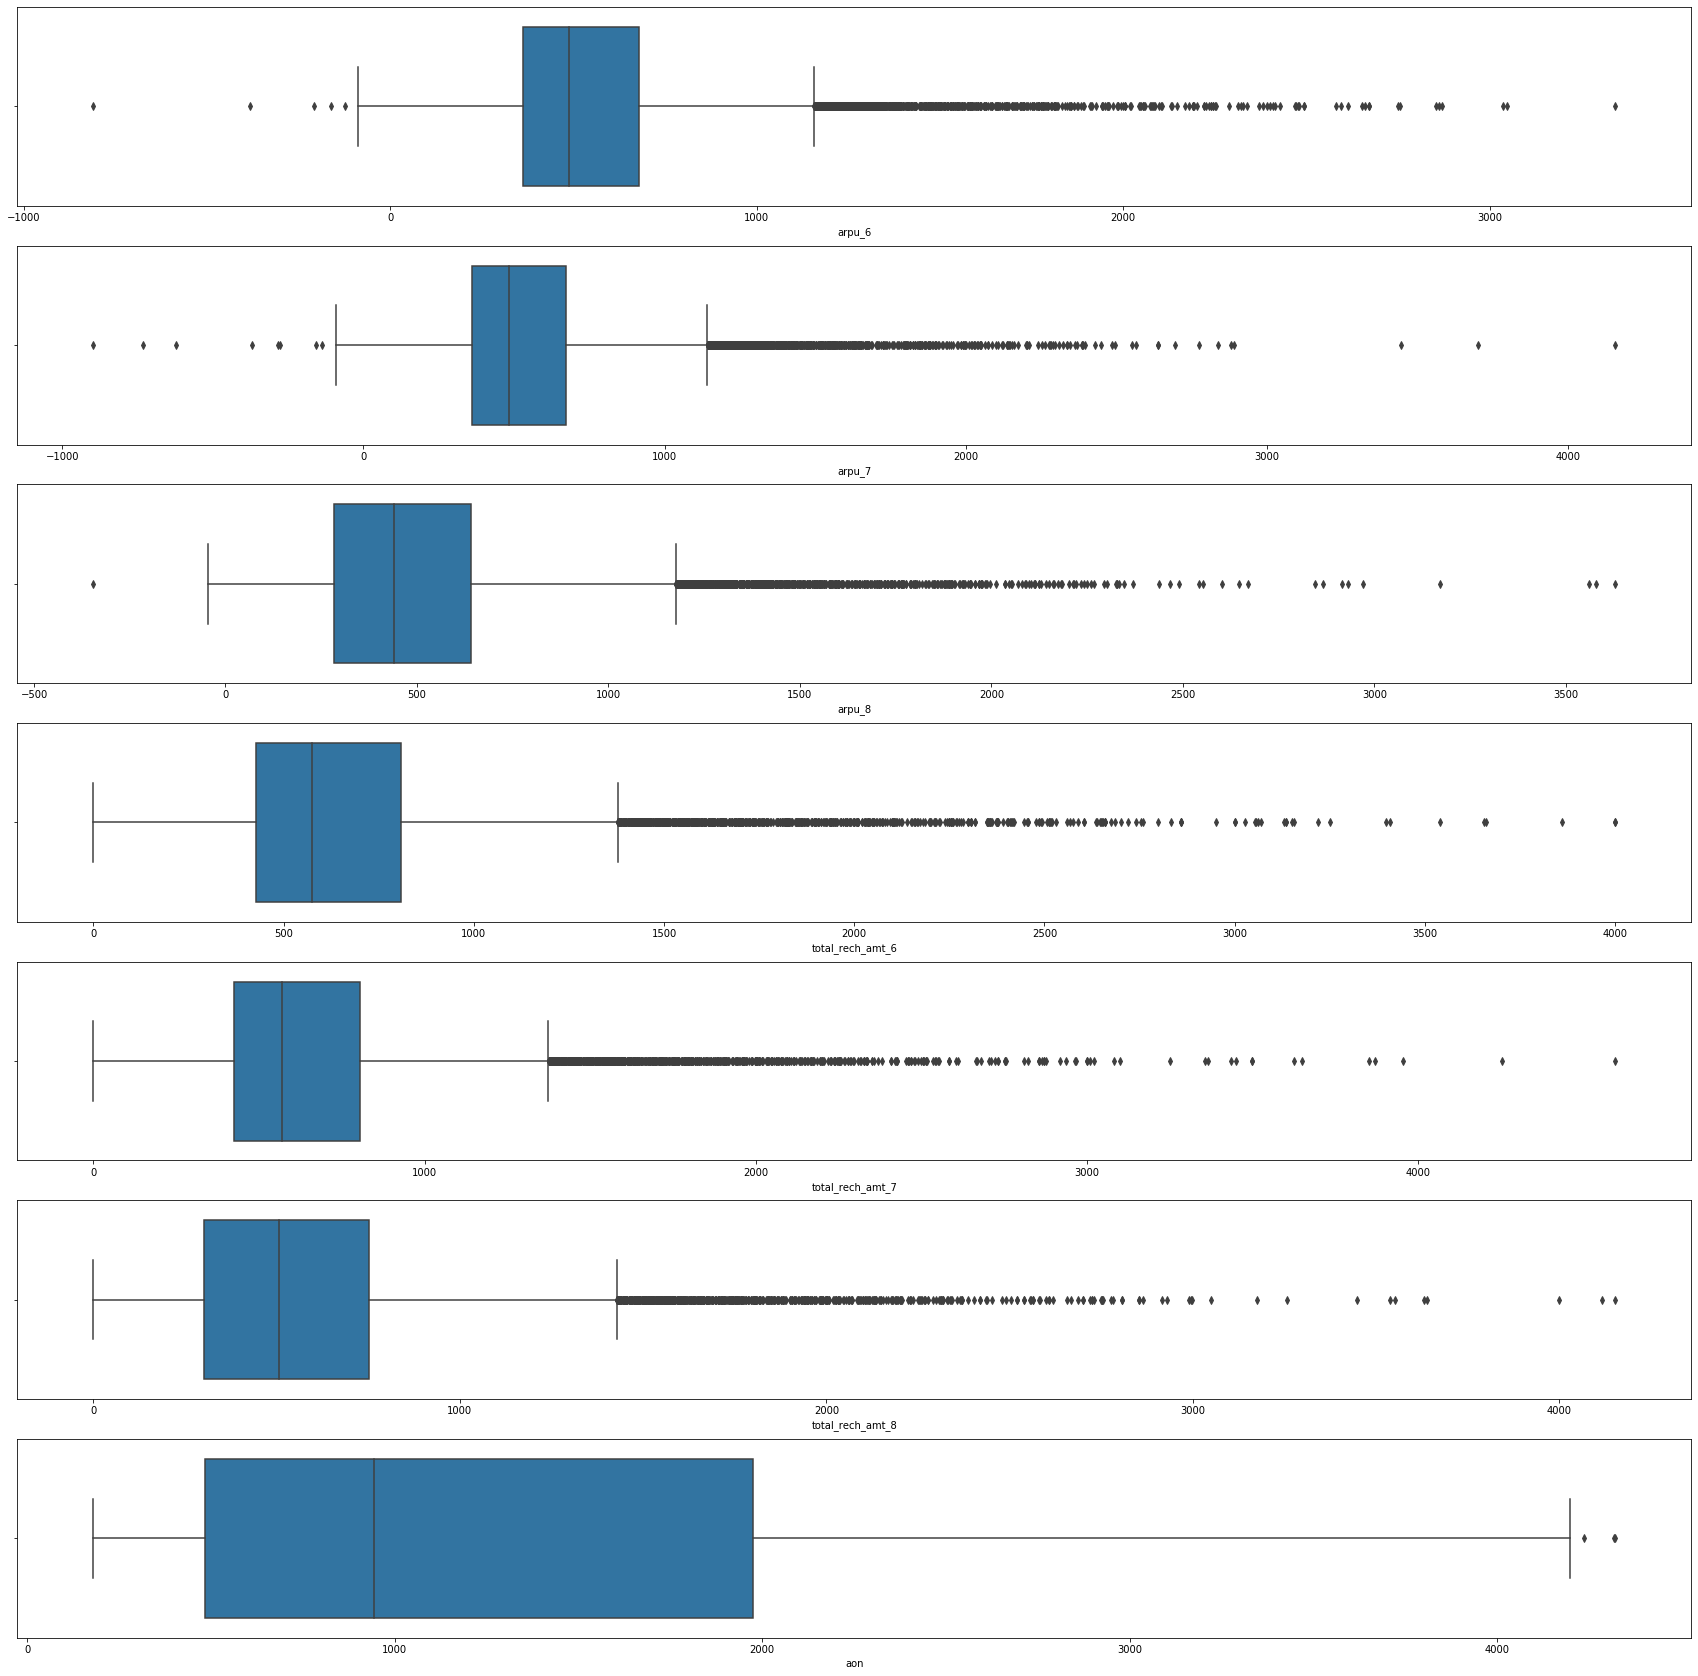

In [37]:
#Pass the features as arguments
features=['arpu_6','arpu_7','arpu_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','aon']
univariate_boxplot(features)

##### <font color='red'>Observation:</font>
1.There is a similar kind of variation in the data for Average Revenue per User(arpu) for June,July,August.

2.There is a similar kind of variation in the data for Total Recharge Amount(total_rech_amt) for June,July,August.

3.Very less outlier seen in Age on network  number of days the customer is using the operator T network(aon).

## <font color='orange'>Bivariate Analysis</font>

In [38]:
#Write a reusable function to be used for bivariate boxplot analysis
def bivariate_boxplot(features):
    plt.figure(figsize = (20,22))
    i = 1
    for col in features:
        plt.subplot(len(features)//2,2,i)
        sns.barplot(x='churn_probability', y=col, data=churn_final)
        i = i+1
    plt.show()

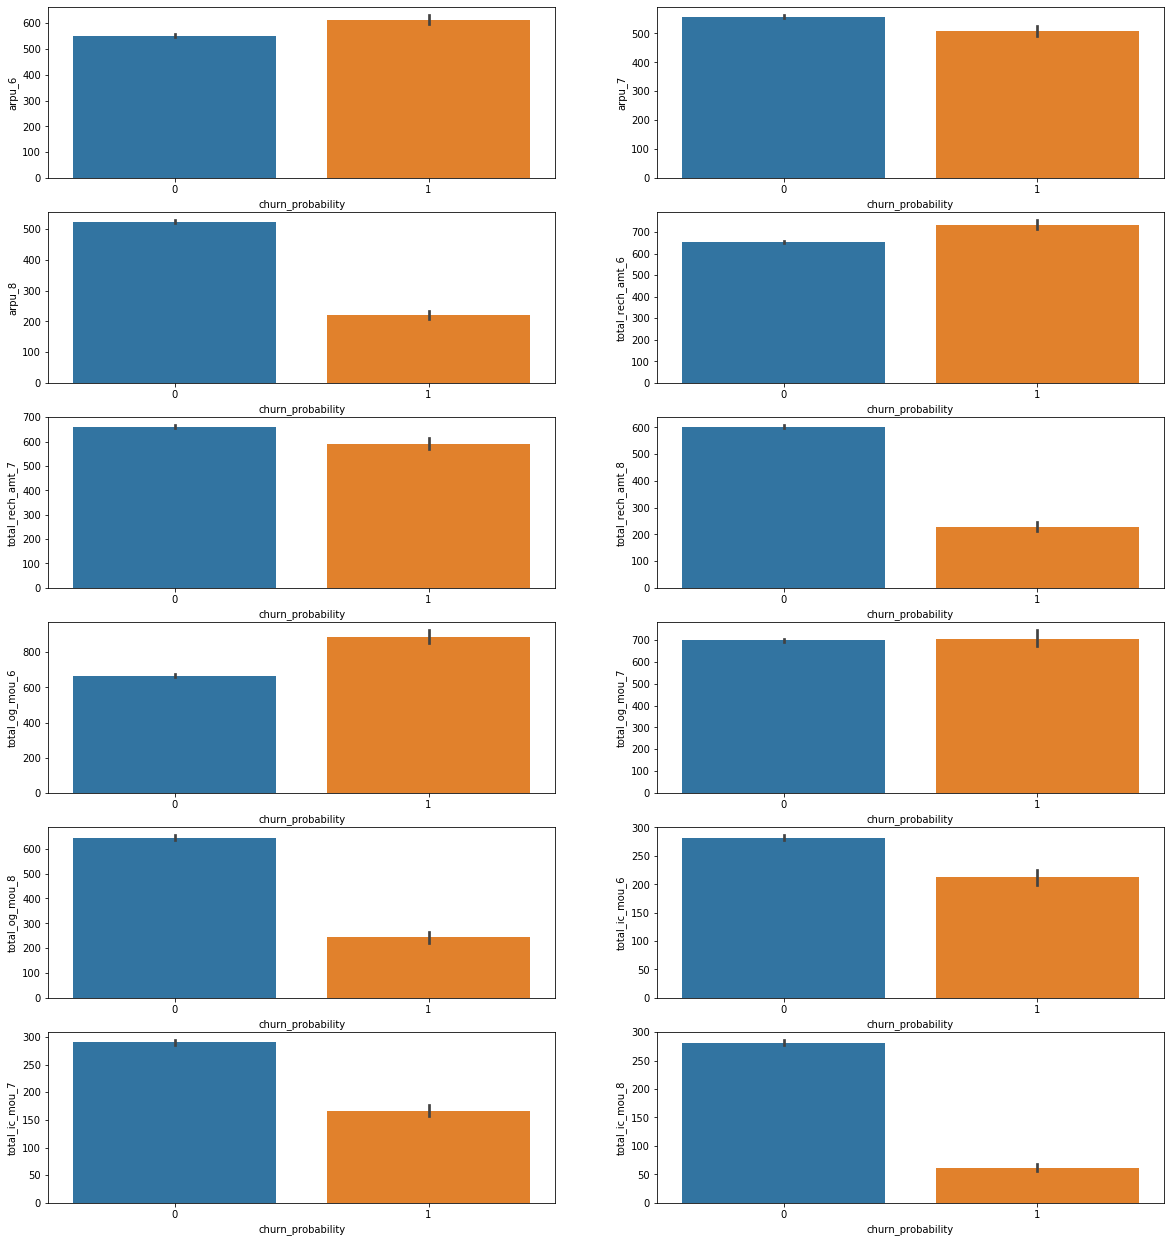

In [39]:
#Pass the features as arguments
features=['arpu_6','arpu_7','arpu_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
bivariate_boxplot(features)

## <font color='orange'>Target Variable Distribution</font>

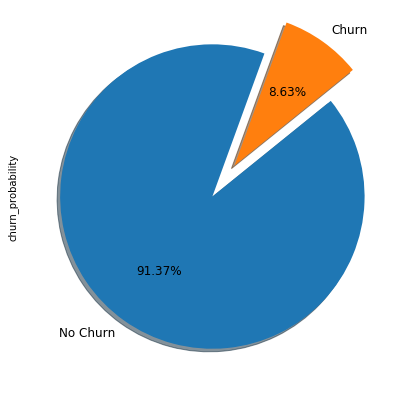

In [40]:
#Churn Distribution
ax = (churn_final['churn_probability'].value_counts()*100.0 /len(churn_final)).plot.pie(explode=[0,0.25], autopct='%1.2f%%',shadow=True,labels = ['No Churn', 'Churn'],figsize =(7,7), fontsize = 12,startangle=70 )                                                                           


##### <font color='red'>Observation:</font>
It is an imbalanced data where there is No churn in 91 percent of the data, we will handle this class imbalance 

## <font color='orange'>Handling Class Imbalance</font>

In [41]:
#Let us Upsample the minority class so there is no loss of information
majority = churn_final[churn_final.churn_probability==0]
minority = churn_final[churn_final.churn_probability==1]
# Upsample minority class
minority_upsampled = resample(minority,replace=True,n_samples=majority.shape[0],random_state=100)  
# Combine majority class with upsampled minority class
upsampled = pd.concat([majority,minority_upsampled])
# Display counts of each class after upsampling
upsampled.churn_probability.value_counts()

0    16732
1    16732
Name: churn_probability, dtype: int64

# <font color='green'>Step3:Model Building</font>

## <font color='orange'>Feature Scaling</font>

In [42]:
#Get y variable
y = upsampled.pop('churn_probability')
X = upsampled
print(X.shape)

(33464, 187)


In [43]:
#Get numerical and categorical variables 
num = X.columns[(X.dtypes=="float64")|(X.dtypes=="int64")].tolist()
print("Number of numerical var:",len(num))
cat = X.columns[(X.dtypes=="object")].tolist()
print("Number of Categorical var:",len(cat))

Number of numerical var: 187
Number of Categorical var: 0


In [44]:
#Train test split to decide on which algorithm performs best
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)
print("Shape of X_train is:", X_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (23424, 187)
Shape of X_test is: (10040, 187)
Shape of y_train is: (23424,)
Shape of y_test is: (10040,)


In [45]:
# Scaling numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_final_scaled = scaler.transform(test_final) #Test data available in test.csv

## <font color='orange'>Principal Component Analysis(PCA)</font>

In [46]:
#Fit PCA on scaled training data
pca = PCA(random_state=100)
pca.fit(X_train_scaled)

PCA(random_state=100)

In [47]:
#Get the explained variance ratio by PCA
pca.explained_variance_ratio_

array([1.24694233e-01, 9.46692869e-02, 5.73309100e-02, 4.55801042e-02,
       4.29951305e-02, 3.93145048e-02, 3.28694806e-02, 2.85047623e-02,
       2.71642561e-02, 2.51573768e-02, 2.30297144e-02, 2.19214832e-02,
       1.99050402e-02, 1.84416861e-02, 1.77445109e-02, 1.62694200e-02,
       1.46547837e-02, 1.42264547e-02, 1.35038436e-02, 1.21468447e-02,
       1.15692300e-02, 1.11593866e-02, 1.10979005e-02, 1.04892428e-02,
       9.69345961e-03, 9.19349060e-03, 8.81793863e-03, 8.17889881e-03,
       7.45289013e-03, 7.20599393e-03, 6.98528248e-03, 6.74751296e-03,
       6.31509831e-03, 6.06030239e-03, 6.02904658e-03, 5.70374635e-03,
       5.66844379e-03, 5.43750713e-03, 5.38032246e-03, 5.03556464e-03,
       4.96305253e-03, 4.89764396e-03, 4.71342811e-03, 4.67525144e-03,
       4.64247718e-03, 4.55654783e-03, 4.47599396e-03, 4.30195025e-03,
       4.10625221e-03, 4.06367188e-03, 4.00867717e-03, 3.91039236e-03,
       3.83092539e-03, 3.75524358e-03, 3.52135371e-03, 3.40447033e-03,
      

In [48]:
#Get the PCA components
pca.components_

array([[-4.31067321e-02, -3.41795779e-02, -6.64993807e-03, ...,
         3.15487971e-02, -1.29280398e-02,  2.51672068e-02],
       [ 1.12264784e-01,  1.39974578e-01,  1.42262246e-01, ...,
         1.21002125e-02,  3.16588337e-02,  2.19955592e-02],
       [-2.49799443e-02, -1.29859382e-03,  1.67566922e-02, ...,
         6.83843310e-04, -3.96281658e-02, -1.27178830e-02],
       ...,
       [ 0.00000000e+00, -1.80588137e-14, -1.74546695e-14, ...,
         5.62273058e-03,  2.02522466e-03, -6.00814395e-03],
       [ 0.00000000e+00,  1.67531112e-14,  1.24088838e-14, ...,
        -2.72853656e-02, -9.82778641e-03,  2.91556570e-02],
       [ 0.00000000e+00,  1.19228168e-14,  9.98194558e-15, ...,
        -1.28774717e-03, -4.63827544e-04,  1.37601655e-03]])

In [49]:
#Find the cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance.round(2)

array([0.12, 0.22, 0.28, 0.32, 0.37, 0.4 , 0.44, 0.47, 0.49, 0.52, 0.54,
       0.56, 0.58, 0.6 , 0.62, 0.64, 0.65, 0.66, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.78, 0.79, 0.8 , 0.81,
       0.81, 0.82, 0.82, 0.83, 0.83, 0.84, 0.84, 0.85, 0.85, 0.86, 0.86,
       0.87, 0.87, 0.88, 0.88, 0.89, 0.89, 0.89, 0.9 , 0.9 , 0.91, 0.91,
       0.91, 0.92, 0.92, 0.92, 0.92, 0.93, 0.93, 0.93, 0.94, 0.94, 0.94,
       0.94, 0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.96, 0.96, 0.96, 0.97,
       0.97, 0.97, 0.97, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99,
       0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.

In [50]:
# Check explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       12.47
1       21.94
2       27.67
3       32.23
4       36.53
5       40.46
6       43.75
7       46.60
8       49.31
9       51.83
10      54.13
11      56.32
12      58.31
13      60.16
14      61.93
15      63.56
16      65.02
17      66.45
18      67.80
19      69.01
20      70.17
21      71.29
22      72.40
23      73.44
24      74.41
25      75.33
26      76.21
27      77.03
28      77.78
29      78.50
30      79.20
31      79.87
32      80.50
33      81.11
34      81.71
35      82.28
36      82.85
37      83.39
38      83.93
39      84.43
40      84.93
41      85.42
42      85.89
43      86.36
44      86.82
45      87.28
46      87.73
47      88.16
48      88.57
49      88.97
50      89.38
51      89.77
52      90.15
53      90.52
54      90.88
55      91.22
56      91.55
57      91.87
58      92.19
59      92.50
60      92.80
61      93.09
62      93.38
63      93.66
64      93.94
65      94.20
66      94.45
67      94.70
68      94.93
69      95.16
70      95.38
71    

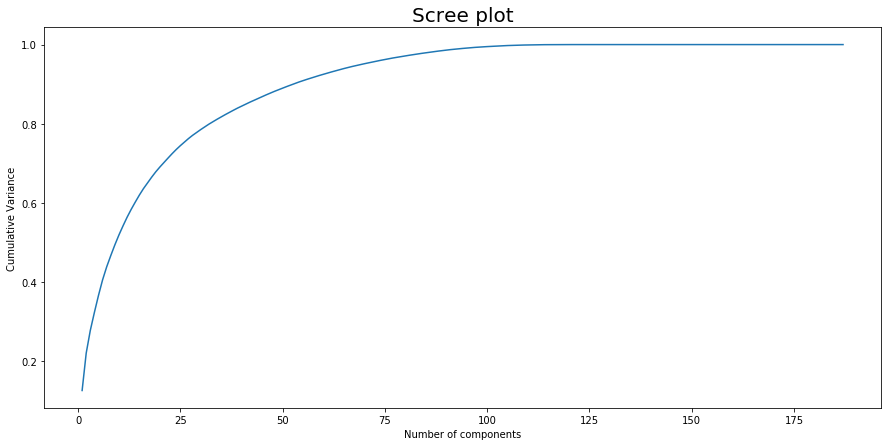

In [51]:
#Scree Plot
plt.figure(figsize=(15, 7))
plt.plot(range(1,len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')
plt.title('Scree plot', fontsize = 20)
plt.show()

##### <font color='red'>Observation:</font>
1.With 50 principal components we can explain around 90 percent of the variance.

2.With 70 principal components we can explain around 95 percent of variance.

In [52]:
#Use 70 Principal Components with Incremental PCA
incremental_pca = IncrementalPCA(n_components=70)
train_pca = incremental_pca.fit_transform(X_train_scaled)
train_pca.shape

(23424, 70)

In [53]:
#Applying PCA to the test data
test_pca = incremental_pca.transform(X_test_scaled)
test_final_pca= incremental_pca.transform(test_final_scaled)
test_final_pca.shape

(30000, 70)

## <font color='orange'>Model Selection</font>

## <font color='orange'>1.Logistic Regression with Cross Validation and Hyperparameter tuning</font>

In [54]:
#Train a Logistic Regression model
model1 = LogisticRegression()

#Hyperparameter
params = {"fit_intercept":[True,False], "class_weight": ['balanced', None]}

# create 3 folds
cv_folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

# intialize gridsearch object
model1_pca = GridSearchCV(estimator=model1, cv=cv_folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
model1_pca.fit(train_pca, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'fit_intercept': [True, False]},
             scoring='roc_auc', verbose=1)

In [55]:
# Print best hyperparameters
print("Best AUC Score: ", model1_pca.best_score_)
print("Best hyperparameters: ", model1_pca.best_params_)

Best AUC Score:  0.8929279771831539
Best hyperparameters:  {'class_weight': None, 'fit_intercept': True}


In [56]:
#Predict
ypred1 = model1_pca.predict(test_pca)

In [57]:
#Let us evaluate the model performance
print(classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      5051
           1       0.83      0.82      0.83      4989

    accuracy                           0.83     10040
   macro avg       0.83      0.83      0.83     10040
weighted avg       0.83      0.83      0.83     10040



In [58]:
# Get sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, ypred1, average='binary')
print('Sensitivity is:',sensitivity)
print('\nSpecificity is:',specificity)

Sensitivity is: 0.8248145921026258

Specificity is: 0.8388437933082558


In [59]:
#Get the Confusion Matrix
print('Confusion Matrix is:',confusion_matrix(y_test, ypred1))

Confusion Matrix is: [[4237  814]
 [ 874 4115]]


## <font color='orange'>2.SVM with Cross Validation and Hyperparameter tuning</font>

In [60]:
#Train a SVM Model
model2 = svm.SVC(kernel='linear')

#Hyperparameter
params = {"gamma":['scale', 'auto'], "class_weight": ['balanced', None]}

# create 3 folds
cv_folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

# intialize gridsearch object
model2_pca = GridSearchCV(estimator=model2, cv=cv_folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
model2_pca.fit(train_pca, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'gamma': ['scale', 'auto']},
             scoring='roc_auc', verbose=1)

In [61]:
# Print best hyperparameters
print("Best AUC Score: ", model2_pca.best_score_)
print("Best hyperparameters: ", model2_pca.best_params_)

Best AUC Score:  0.8917752610601815
Best hyperparameters:  {'class_weight': None, 'gamma': 'scale'}


In [62]:
#Predict
ypred2 = model2_pca.predict(test_pca)

In [63]:
#Let us evaluate the model performance
print(classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      5051
           1       0.85      0.82      0.83      4989

    accuracy                           0.84     10040
   macro avg       0.84      0.84      0.84     10040
weighted avg       0.84      0.84      0.84     10040



In [64]:
# Get sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, ypred2, average='binary')
print('Sensitivity is:',sensitivity)
print('\nSpecificity is:',specificity)

Sensitivity is: 0.816796953297254

Specificity is: 0.8576519501088893


In [65]:
#Get the Confusion Matrix
print('Confusion Matrix is:',confusion_matrix(y_test, ypred2))

Confusion Matrix is: [[4332  719]
 [ 914 4075]]


## <font color='orange'>3.Random Forest with Cross Validation and Hyperparameter tuning</font>

In [66]:
#Train a RandomForest Model
model3 = RandomForestClassifier(oob_score = True , n_jobs = -1)

#Hyperparameter
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 3 folds
cv_folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

# intialize gridsearch object
model3_pca = GridSearchCV(estimator=model3, cv=cv_folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
model3_pca.fit(train_pca, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [67]:
# Print best hyperparameters
print("Best AUC Score: ", model3_pca.best_score_)
print("Best hyperparameters: ", model3_pca.best_params_)

Best AUC Score:  0.9988277753850082
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [68]:
#Predict
ypred3 = model3_pca.predict(test_pca)

In [69]:
#Let us evaluate the model performance
print(classification_report(y_test, ypred3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5051
           1       0.98      1.00      0.99      4989

    accuracy                           0.99     10040
   macro avg       0.99      0.99      0.99     10040
weighted avg       0.99      0.99      0.99     10040



In [70]:
# Get sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, ypred3, average='binary')
print('Sensitivity is:',sensitivity)
print('\nSpecificity is:',specificity)

Sensitivity is: 0.9993986770895971

Specificity is: 0.9750544446644229


In [71]:
#Get the Confusion Matrix
print('Confusion Matrix is:',confusion_matrix(y_test, ypred3))

Confusion Matrix is: [[4925  126]
 [   3 4986]]


## <font color='red'>Finalize Model:Random Forest</font>
1.RandomForest beats-LogisticRegression,SVM in all metrics(Sensitivity,Specificity,F1 Score,Precision,Recall) so it will be our preferred algorithm.

2.Sensitivity which is True Positive/(True Positive + False Negative) is the metrics to be looked out for identifying High value customers who are likely to churn. RandomForest has Sensitivity of 0.999 so it is the best suited algorithm for this usecase.

# <font color='green'>Step4:Prediction on test.csv using preferred algorithm to be used for Kaggle</font>

In [72]:
#Predict
ypred_final = model3_pca.predict(test_final_pca)

In [73]:
#Prepare the final output to be submitted
id= telecom_test['id']
submission_df =pd.DataFrame(np.c_[id,ypred_final] ,columns= ["id","churn_probability"])
submission_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [74]:
submission_df.to_csv("Submission.csv",index=False) 

# <font color='green'>Step5:Identify most important Predictor variables for Churn</font>

In [75]:
#Here we will not use PCA since we want to identify the original features
rf = RandomForestClassifier(oob_score = True , n_jobs = -1)
#fit
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True)

In [76]:
# Get feature importances from the trained model
feature_importances = rf.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                   Feature  Importance
90          total_ic_mou_8    0.067123
87          total_og_mou_8    0.064485
96        total_rech_amt_8    0.052320
146     min_total_rech_amt    0.042119
11           roam_og_mou_8    0.040782
84                  arpu_8    0.035873
8            roam_ic_mou_8    0.034305
102     last_day_rch_amt_8    0.029044
149       mean_roam_og_mou    0.022534
59            loc_ic_mou_8    0.019539
148       mean_roam_ic_mou    0.016177
99          max_rech_amt_8    0.015452
53        loc_ic_t2m_mou_8    0.015439
26            loc_og_mou_8    0.015413
17        loc_og_t2m_mou_8    0.013455
150          mean_roam_mou    0.013408
50        loc_ic_t2t_mou_8    0.007921
93        total_rech_num_8    0.007908
111     av_rech_amt_data_8    0.007853
14        loc_og_t2t_mou_8    0.007687
141      mean_max_rech_amt    0.007293
143     min_total_rech_num    0.007291
157    mean_loc_ic_t2m_mou    0.006749
108        max_rech_data_8    0.006447
159       mean_loc_t2m_mo

## <font color='red'>Top predictor Variables for Churn</font>
1.total_ic_mou_8(Total minutes of usage for incoming voice calls for the month of August)

2.total_og_mou_8(Total minutes of usage for outgoing voice calls for the month of August)

3.total_rech_amt_8(Total recharge amount for the month of August)

4.min_total_rech_amt(derived feature to indicate minimum total recharge amount)

5.roam_og_mou_8(Total minutes of usage for outgoing voice calls while on roaming zone for the month of August)

6.arpu_8(Average Revenue per user for the month of August)

7.roam_ic_mou_8(Total minutes of usage for incoming voice calls while on roaming zone for the month of August)

8.last_day_rch_amt_8(Number of days since last recharge in the month of August)

9.mean_roam_og_mou(derived feature to indicate average minutes of usage for outgoing voice calls during roaming)

10.loc_ic_mou_8(Local minutes of usage for incoming voice calls for the month of August)

## <font color='red'>Suggestions to prevent Churn</font>
1.Provide good offers/package to customers whose incoming and outgoing minutes of usage are high to prevent churn.

2.Provide good roaming package for both incoming and outgoing calls.

3.Provide better value for money package for higher recharge amount.

4.Customers whose number of days since last recharge is high should be provided value based offers to prevent churn.